In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#Parameters
trading_window = 15

#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [10]:
dataimport=pd.read_csv('/Users/vedantgupta/Documents/project /summer project(finance)/data-analysis-with-technical-indicators-2/Pair Trading final/data/Indexes/Nifty_50.csv')
datacopy1 = dataimport.copy()
dataimport['Date'] = pd.to_datetime(dataimport['Date'])
curr = dataimport.columns[0]
dataimport.rename(columns={curr: 'Stocks'}, inplace=True)
dataimport.set_index('Stocks', inplace=True)

#data = dataimport.resample('M').first()  #Monthly Resampling



dataimport.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-03,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,303.569244,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
2011-01-04,83.358696,137.957016,435.507385,255.619690,248.287949,1003.359985,63.260792,45.380741,60.294853,301.077179,...,233.050705,224.143417,441.225677,93.640793,243.823334,46.894550,145.471405,170.863922,1036.665527,160.227905
2011-01-05,83.576599,146.361649,430.650635,259.612366,241.463486,964.553528,62.998871,45.046360,58.357433,294.825806,...,229.438522,223.297012,446.698883,92.978455,240.893860,45.966370,142.335739,170.083847,1019.882263,160.558502
2011-01-06,82.596054,143.900589,427.349915,256.818451,240.533295,931.816956,62.208553,44.052860,57.084274,298.373932,...,223.406967,228.764465,451.613007,91.902100,236.800064,46.125011,142.589737,167.194855,961.211853,160.789902
2011-01-07,80.506813,136.749664,432.772583,250.171555,235.891541,923.922119,59.580208,43.214451,56.918213,285.955750,...,221.579605,225.721909,440.416199,89.666672,223.504745,44.636559,138.262314,159.387207,939.246277,157.682205


In [11]:

def first_last_diff(x):
    return ((x.iloc[-1] - x.iloc[0])/x.iloc[0])
monthly = dataimport[dataimport.columns].resample('W').agg(first_last_diff)
monthly.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-09,-0.031830,0.015167,-0.014390,-0.034371,-0.063613,-0.108297,-0.063994,-0.052190,-0.065156,-0.058021,...,-0.078364,0.012415,-0.013299,-0.028699,-0.090374,-0.060791,-0.005551,-0.074481,-0.091891,-0.012628
2011-01-16,0.098110,-0.008547,-0.006228,0.017982,-0.042245,-0.011848,-0.016775,-0.032744,-0.018997,0.013713,...,-0.018178,-0.004612,-0.009506,0.001439,0.004844,-0.043415,-0.021938,0.035754,0.025365,-0.003229
2011-01-23,0.043981,0.021152,0.023134,0.000244,0.047233,0.035399,-0.007413,0.027210,0.009050,-0.035725,...,0.032072,0.042866,0.065281,0.007150,0.007253,0.006233,-0.001663,0.023647,0.013109,-0.023138
2011-01-30,-0.092725,-0.019332,-0.060712,-0.015968,-0.054498,-0.035721,-0.078092,-0.017625,0.051979,-0.017563,...,-0.027792,-0.074162,-0.021385,-0.060706,-0.031979,-0.018175,-0.058430,-0.028327,-0.019504,-0.009761
2011-02-06,0.067263,-0.039844,-0.072198,-0.035402,-0.015778,-0.015370,0.005447,0.003669,-0.040049,0.042320,...,0.001287,-0.055121,-0.009228,-0.041730,0.003313,-0.005940,-0.024963,-0.024368,0.004039,-0.003195


In [12]:
data = dataimport.transpose()
#data.head()

In [13]:
train_data = monthly.iloc[:48]  

for i in train_data.columns:
    train_data[i] = (1 + train_data[i]).cumprod() - 1

train_data=train_data.transpose()
train_data

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_61352/2233235851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[i] = (1 + train_data[i]).cumprod() - 1


Stocks,2011-01-09,2011-01-16,2011-01-23,2011-01-30,2011-02-06,2011-02-13,2011-02-20,2011-02-27,2011-03-06,2011-03-13,...,2011-10-02,2011-10-09,2011-10-16,2011-10-23,2011-10-30,2011-11-06,2011-11-13,2011-11-20,2011-11-27,2011-12-04
ADANIENT.NS,-0.031830,0.063156,0.109915,0.006999,0.074733,0.067881,0.095283,0.038173,0.018636,0.020181,...,-0.142354,-0.216637,-0.198771,-0.205732,-0.173689,-0.200748,-0.206454,-0.416965,-0.400241,-0.360294
ADANIPORTS.NS,0.015167,0.006491,0.027780,0.007911,-0.032248,-0.005326,0.005827,0.037686,-0.001415,-0.000656,...,0.158219,0.183562,0.188148,0.146613,0.197166,0.204833,0.122050,-0.002702,-0.099439,-0.071652
APOLLOHOSP.NS,-0.014390,-0.020529,0.002130,-0.058711,-0.126671,-0.132960,-0.094635,-0.097462,-0.101538,-0.099507,...,0.144287,0.130296,0.141611,0.145348,0.140645,0.184094,0.134598,0.064442,0.223418,0.312123
ASIANPAINT.NS,-0.034371,-0.017007,-0.016767,-0.032467,-0.066720,-0.067840,-0.068162,-0.127716,-0.088638,-0.079744,...,0.052453,0.052268,0.043447,0.003129,0.009925,0.031165,-0.002459,-0.018300,-0.016629,-0.043906
AXISBANK.NS,-0.063613,-0.103170,-0.060809,-0.111993,-0.126005,-0.130878,-0.112572,-0.163124,-0.087750,-0.100332,...,-0.188464,-0.154147,-0.110195,-0.105555,-0.119371,-0.142804,-0.205458,-0.270036,-0.254427,-0.243485
BAJAJ-AUTO.NS,-0.108297,-0.118862,-0.087671,-0.120260,-0.133781,-0.106681,-0.078750,-0.115648,-0.040567,-0.034454,...,0.153852,0.141398,0.200064,0.190598,0.234374,0.244970,0.260532,0.227566,0.239665,0.313720
BAJFINANCE.NS,-0.063994,-0.079696,-0.086518,-0.157854,-0.153266,-0.146152,-0.123695,-0.197343,-0.169073,-0.125029,...,-0.090095,-0.102423,-0.050919,-0.090080,-0.020994,0.016951,-0.024583,-0.023756,-0.047127,-0.041736
BAJAJFINSV.NS,-0.052190,-0.083225,-0.058279,-0.074877,-0.071482,-0.066784,-0.060015,-0.059133,0.189236,0.269912,...,0.192780,0.179293,0.204512,0.233923,0.236207,0.225143,0.186335,0.110692,0.045629,0.025005
BPCL.NS,-0.065156,-0.082916,-0.074616,-0.026515,-0.065502,-0.084274,-0.102326,-0.179074,-0.139693,-0.156308,...,-0.009196,-0.024214,-0.048741,-0.030692,-0.041226,-0.038531,-0.109751,-0.156772,-0.134237,-0.098669
BHARTIARTL.NS,-0.058021,-0.045104,-0.079217,-0.095389,-0.057106,-0.099329,-0.088323,-0.090942,-0.102878,-0.108132,...,-0.108812,-0.169986,-0.124097,-0.128821,-0.108464,-0.095948,-0.099477,-0.116589,-0.146836,-0.140011


In [14]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(train_data)
labels = ap.predict(train_data)

In [15]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(train_data.index[j])
    groups.append(arr)


for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['BAJAJFINSV.NS']
Group 2 : ['BAJFINANCE.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'DRREDDY.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'M&M.NS', 'RELIANCE.NS', 'SHRIRAMFIN.NS']
Group 3 : ['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS', 'ULTRACEMCO.NS']
Group 4 : ['ADANIENT.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TECHM.NS', 'WIPRO.NS']
Group 5 : ['HINDALCO.NS', 'INFY.NS', 'JSWSTEEL.NS', 'LT.NS', 'MARUTI.NS', 'ONGC.NS', 'SBIN.NS', 'TATASTEEL.NS']
Group 6 : ['ADANIPORTS.NS', 'BPCL.NS', 'DIVISLAB.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'NTPC.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TITAN.NS']


# Indicators

In [16]:

datacopy1['Date'] = pd.to_datetime(datacopy1['Date'])
datacopy1.set_index('Date', inplace=True)
data = datacopy1.resample('W').first()  # Weekly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-09,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-01-16,74.924774,130.388138,446.682709,241.339020,231.093201,885.431335,58.148621,42.477810,55.848026,...,216.992065,218.241302,435.887360,86.313469,220.969604,43.924397,135.361099,153.767944,946.568054,153.599243
2,2011-01-23,78.103516,127.323494,440.269867,239.996140,226.377777,890.097961,57.267994,40.074051,54.025948,...,214.359619,212.933975,438.392639,86.851639,221.373337,42.233444,135.116898,159.999146,961.116760,154.310028
3,2011-01-30,81.487343,132.106247,484.641113,236.219772,244.198822,917.431091,57.945408,40.970615,55.465157,...,229.596161,221.787140,466.066864,87.969368,223.147934,43.826523,135.917892,166.711365,967.772949,146.755707
4,2011-02-06,72.316422,130.527466,463.705078,232.303726,228.809158,874.343567,53.059036,39.623344,56.553787,...,225.110825,201.701630,447.663940,82.339333,215.401688,43.181862,127.175156,168.208435,953.557190,145.489288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2022-12-04,3884.209229,872.732849,4702.564941,3124.898682,890.791016,3567.559570,6748.773438,1651.979370,321.788910,...,587.152405,1017.618103,3247.441650,790.030212,431.903900,101.584465,1038.492798,2583.878418,6860.942383,403.792145
622,2022-12-11,3928.437256,887.185730,4758.833496,3130.551270,898.283325,3551.258301,6632.268555,1633.339233,319.569672,...,595.545898,1022.191223,3276.757080,786.297668,427.417877,112.188362,1060.232544,2607.202881,7165.849121,410.461487
623,2022-12-18,4014.694092,875.414856,4722.930664,3139.922607,937.693176,3489.982910,6478.969727,1591.261353,329.579865,...,591.445618,971.052185,3143.377930,795.678223,412.863220,108.169533,995.013489,2576.302979,7114.334473,394.534760
624,2022-12-25,4073.264893,886.887695,4591.619629,3055.235352,945.235413,3522.003418,6658.706055,1618.197266,322.308319,...,583.148743,971.593018,3062.652588,794.499573,416.701263,108.266380,989.807434,2513.656006,7043.806641,387.268188


In [17]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [18]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-05-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-05-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
608,2022-12-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,2022-12-18,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
610,2022-12-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [20]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,55.581917,56.290978,61.647384,39.092074,59.151215,49.246897,59.974244,64.078852,41.200653,...,54.799400,46.591639,55.807652,48.902353,49.524976,38.691622,56.858899,59.339447,55.507890,49.448834
1,2011-04-24,52.242237,60.376834,56.582467,41.113522,56.503309,54.468619,56.230053,59.778591,41.908372,...,51.881113,40.113935,50.120194,45.682060,47.955730,34.816634,51.411902,62.607897,50.060958,44.602887
2,2011-05-01,53.901890,55.799748,49.186493,50.507161,54.854620,57.816699,57.305275,64.321687,52.778113,...,62.807533,45.946213,57.473280,48.712974,52.314703,41.932371,53.880151,68.297444,48.557971,51.843478
3,2011-05-08,50.242853,52.004474,47.991745,57.805428,43.760464,53.846484,53.709772,58.723014,57.180699,...,47.202978,54.127284,51.431857,45.363885,50.192912,38.223549,47.466484,59.352532,52.903261,46.047500
4,2011-05-15,48.411821,39.345973,47.855210,57.794033,40.385080,41.808231,43.457469,50.412608,62.605253,...,43.618206,44.660361,48.256773,42.034529,44.688962,33.107282,43.678942,60.120174,48.903441,42.870120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,70.695100,57.696990,60.293474,49.446520,63.704617,48.312164,47.447658,54.065123,57.727166,...,65.905723,69.670724,57.128851,57.241745,51.447839,50.676856,50.011679,54.056787,58.162934,43.705760
608,2022-12-11,71.390403,59.216037,61.456090,49.733858,64.420295,47.538059,45.290156,52.626095,56.651620,...,67.241366,70.214208,58.388296,56.157936,50.153868,60.260689,52.693602,55.204329,62.914305,46.014851
609,2022-12-18,72.748421,57.407984,60.243997,50.238835,67.995128,44.642445,42.548576,49.427839,60.249254,...,65.883549,57.751483,51.041266,58.295088,46.102456,55.832801,44.909315,53.304809,61.640588,41.623996
610,2022-12-25,73.662616,58.730638,55.901388,45.764520,68.644432,46.477146,46.627942,51.461421,56.576045,...,63.106616,57.836718,47.172426,57.913089,47.311141,55.916865,44.346150,49.579992,59.853973,39.759835


In [21]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,83.224121,136.126511,467.618774,231.312332,259.689728,969.886719,64.611099,51.375618,54.201237,...,237.191010,206.071075,454.961121,84.864586,229.016281,42.186188,142.540878,177.337997,1026.490845,152.762100
1,2011-04-24,81.519402,139.901352,458.989716,232.677750,255.996613,1008.974121,63.224663,50.052582,54.353455,...,234.409515,198.864944,441.911438,83.125877,226.443604,41.318771,137.852051,182.193481,994.350525,147.913589
2,2011-05-01,82.467888,136.825546,444.325104,239.928513,253.694138,1036.973999,63.743996,52.383648,57.056595,...,248.657852,204.057922,462.470276,84.574791,233.335419,42.304314,140.284378,192.259613,984.936768,154.821075
3,2011-05-08,80.622169,134.076019,441.731628,247.228867,235.117905,1010.903870,62.429844,50.556591,58.435856,...,229.395950,212.888214,447.258636,82.794693,230.105453,41.490898,134.276825,183.001617,1011.799500,148.644196
4,2011-05-15,79.667259,121.999428,441.448761,247.219803,227.989471,909.396057,57.841534,47.343502,60.428596,...,223.479401,201.404221,438.417358,80.890411,220.997757,40.171211,130.213135,184.265091,987.646790,144.841721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,3884.209229,872.732849,4702.564941,3124.898682,890.791016,3567.559570,6748.773438,1651.979370,321.788910,...,587.152405,1017.618103,3247.441650,790.030212,431.903900,101.584465,1038.492798,2583.878418,6860.942383,403.792145
608,2022-12-11,3928.437256,887.185730,4758.833496,3130.551270,898.283325,3551.258301,6632.268555,1633.339233,319.569672,...,595.545898,1022.191223,3276.757080,786.297668,427.417877,112.188362,1060.232544,2607.202881,7165.849121,410.461487
609,2022-12-18,4014.694092,875.414856,4722.930664,3139.922607,937.693176,3489.982910,6478.969727,1591.261353,329.579865,...,591.445618,971.052185,3143.377930,795.678223,412.863220,108.169533,995.013489,2576.302979,7114.334473,394.534760
610,2022-12-25,4073.264893,886.887695,4591.619629,3055.235352,945.235413,3522.003418,6658.706055,1618.197266,322.308319,...,583.148743,971.593018,3062.652588,794.499573,416.701263,108.266380,989.807434,2513.656006,7043.806641,387.268188


#  strat1 RSI+MACD fixed exit strat

In [22]:
def get_returns(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            n = 0
            temp = 0

        i += 1

    return returns,num_trades

In [23]:
returns,num_trades = get_returns(groups,master_macd,master_rsi,prices,trading_window)

In [24]:
tradesheet1 = pd.DataFrame()
tradesheet1['Returns'] = returns
tradesheet1['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet1.insert(0,f'Window (period = {trading_window})',windows)
tradesheet1

,Window (period = 15),Returns,Number of Trades
0,1,32.957947,3
1,2,60.435711,5
2,3,140.150177,10
3,4,219.721705,10
4,5,-107.005664,13
5,6,-47.892673,12
6,7,89.395052,5
7,8,297.201713,7
8,9,-25.814538,5
9,10,18.095528,6


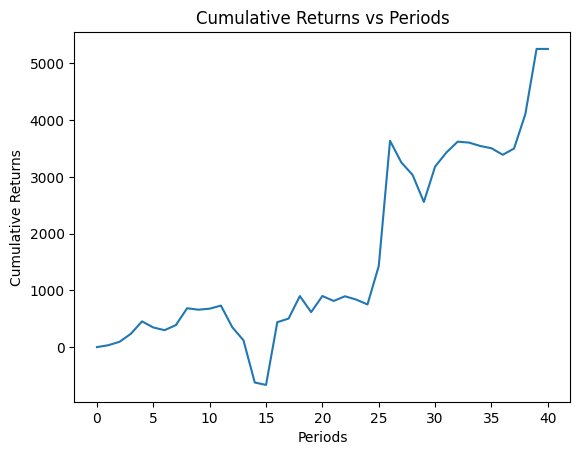

In [25]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


# Strat-2 with variable exit in window + fixed exit at the end

In [26]:
def get_returns_2(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades

In [27]:
returns,num_trades = get_returns_2(groups,master_macd,master_rsi,prices,trading_window)

In [28]:
tradesheet2 = pd.DataFrame()
tradesheet2['Returns'] = returns
tradesheet2['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet2.insert(0,f'Window (period = {trading_window})',windows)
tradesheet2

,Window (period = 15),Returns,Number of Trades
0,1,32.957947,3
1,2,33.953809,5
2,3,85.269363,10
3,4,205.147335,10
4,5,-74.315914,13
5,6,-127.342331,12
6,7,-68.402616,5
7,8,304.075562,7
8,9,-0.775026,5
9,10,7.691506,6


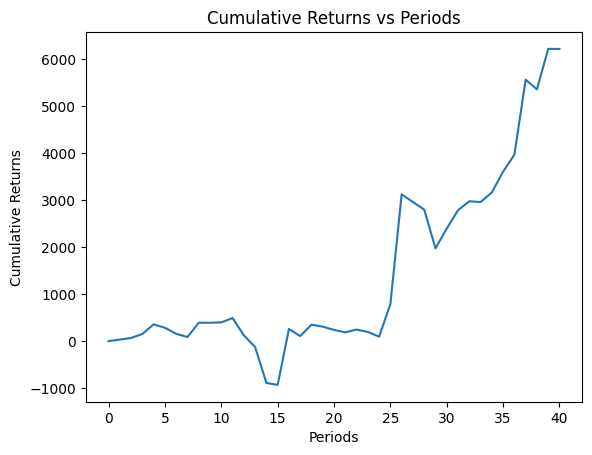

In [29]:

cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


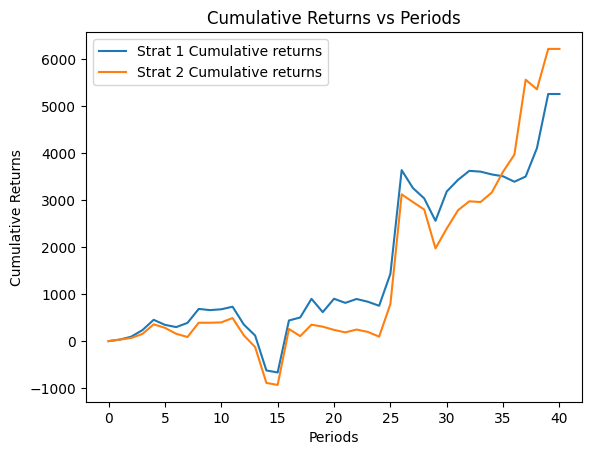

In [30]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()

# strat 3 RSI Fixed exit

In [31]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [32]:
returns,num_trades = get_returns(groups,master_rsi,prices,trading_window)

In [33]:
tradesheet3 = pd.DataFrame()
tradesheet3['Returns'] = returns
tradesheet3['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet3.insert(0,f'Window (period = {trading_window})',windows)
tradesheet3

,Window (period = 15),Returns,Number of Trades
0,1,81.818236,3
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,35.928829,4
5,6,0.000000,0
6,7,0.000000,0
7,8,0.000000,0
8,9,215.119808,7
9,10,0.000000,0


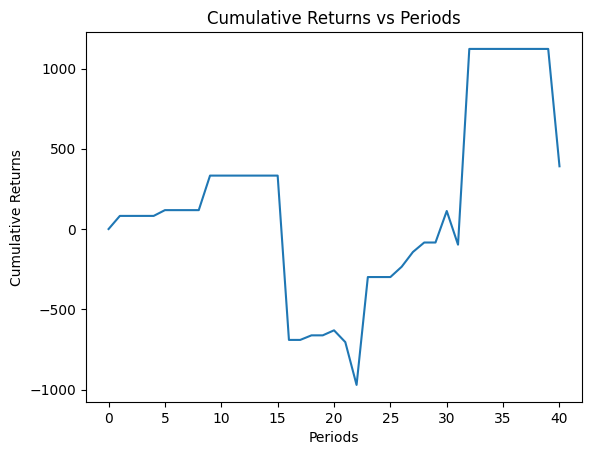

In [34]:
cumulative_returns_3 = []
cumulative_returns_3.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_3.append(s)


plt.plot(windows,cumulative_returns_3)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# strat 4 RSI variable exit

In [35]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [36]:
tradesheet4 = pd.DataFrame()
tradesheet4['Returns'] = returns
tradesheet4['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet4.insert(0,f'Window (period = {trading_window})',windows)
tradesheet4

,Window (period = 15),Returns,Number of Trades
0,1,81.818236,3
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,35.928829,4
5,6,0.000000,0
6,7,0.000000,0
7,8,0.000000,0
8,9,215.119808,7
9,10,0.000000,0


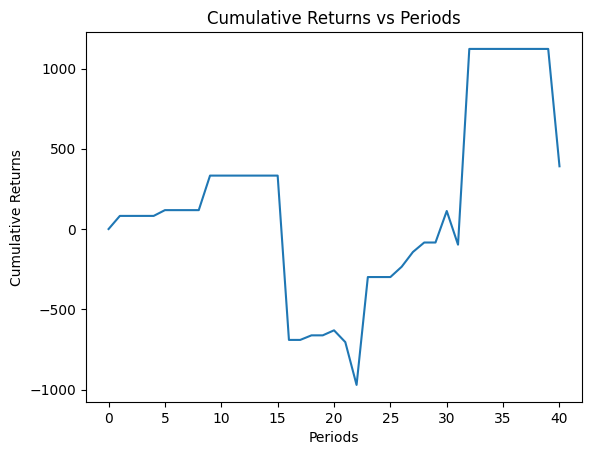

In [37]:
cumulative_returns_4 = []
cumulative_returns_4.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_4.append(s)


plt.plot(windows,cumulative_returns_4)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

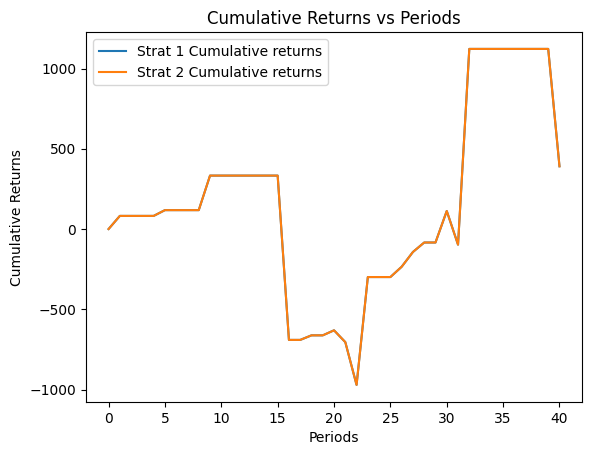

In [38]:
plt.plot(windows,cumulative_returns_3,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_4,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()
